# Predicting Weight Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Exploring the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
785,Female,16.172992,1.603842,65.000000,yes,yes,2.543563,1.000000,Sometimes,no,2.000000,yes,0.694281,1.056911,Sometimes,Public_Transportation,Overweight_Level_I
1494,Male,18.000000,1.803527,108.251044,yes,yes,2.000000,1.709546,Sometimes,no,2.530157,no,1.000000,0.645400,no,Public_Transportation,Obesity_Type_I
167,Male,20.000000,1.650000,80.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,2.000000,no,Walking,Overweight_Level_II
1133,Male,34.098174,1.841151,91.798103,yes,yes,2.000000,2.997414,Sometimes,no,1.259454,no,0.935217,0.997600,Sometimes,Automobile,Overweight_Level_II
615,Female,20.345161,1.534385,41.965250,no,yes,2.888530,1.000000,Frequently,no,1.000000,no,0.000000,0.196224,Sometimes,Public_Transportation,Insufficient_Weight


We will check if there are duplicates in the dataset

In [3]:
duplicates = data[data.duplicated(keep=False)]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:",len(duplicates))
    data.drop_duplicates(keep='first', inplace=True)

Duplicates found: 33


In [4]:
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')

2087 rows, 17 columns


In [5]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Look at the information about each columns and its dataset

data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Look at the information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

### Looking into categorical values and what they contain

'NObeyesdad' is a label for the weight status

In [8]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64


'CAEC' is Consumption of food between meals

In [9]:
column_name = 'CAEC'

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64


'CALC' is and Consumption of alcohol

In [10]:
column_name = 'CALC' 

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CALC': 4
Value counts:
Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64


'MTRANS' is means of Transportation used.

In [11]:
column_name = 'MTRANS' 

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'MTRANS': 5
Value counts:
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


### Reducing the transportation classes based on the physical activity

In [12]:
def split_transport(transportation):
    physical = [
        'Walking', 'Bike']

    carried = [
        'Automobile', 'Motorbike']

    if transportation in physical:
        return 'Walking, Bike'
    elif transportation in carried:
        return 'Automobile, Motorbike'
    else:
        return 'Public_Transportation'

Apply the function to create a new column for transportation where it's devided by physical activity

In [13]:
data['Transportation'] = data['MTRANS'].apply(split_transport)
data = data.drop('MTRANS', axis=1)

In [14]:
column_name = 'Transportation' 

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'Transportation': 3
Value counts:
Public_Transportation    1558
Automobile, Motorbike     467
Walking, Bike              62
Name: Transportation, dtype: int64


## Visualizing relationships / plotting the data

### Some visualization for categorical features

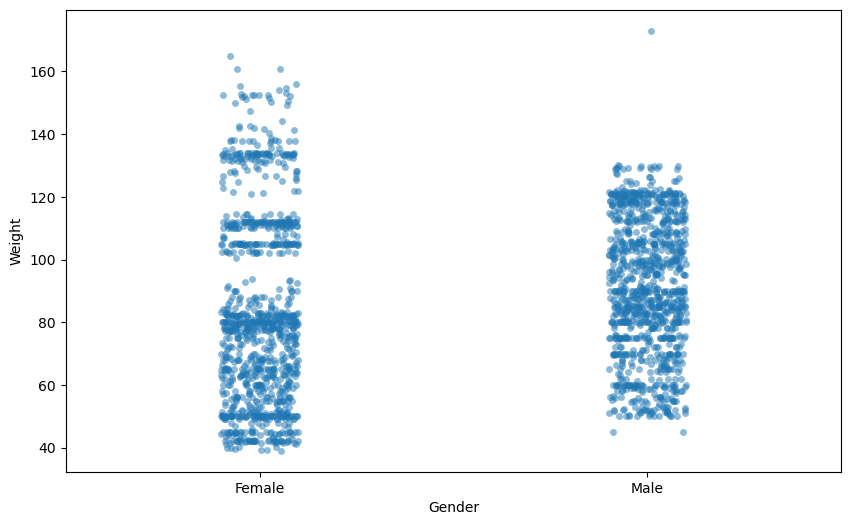

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['Gender'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

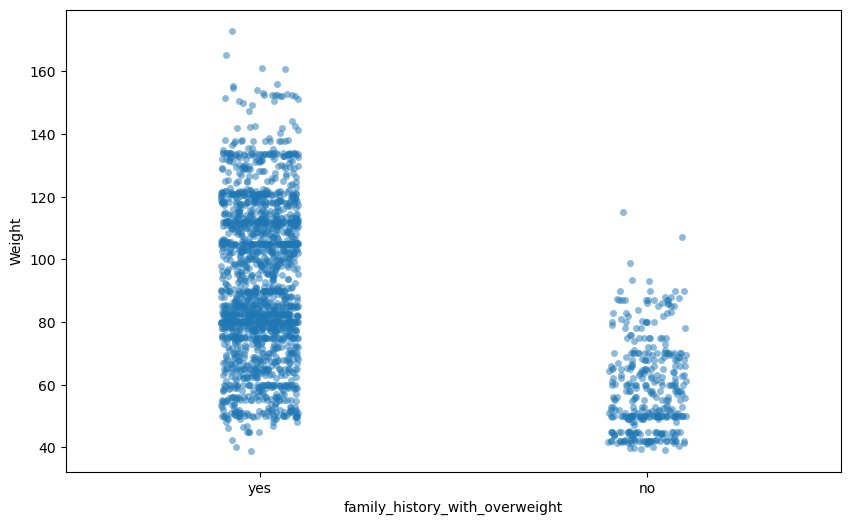

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['family_history_with_overweight'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

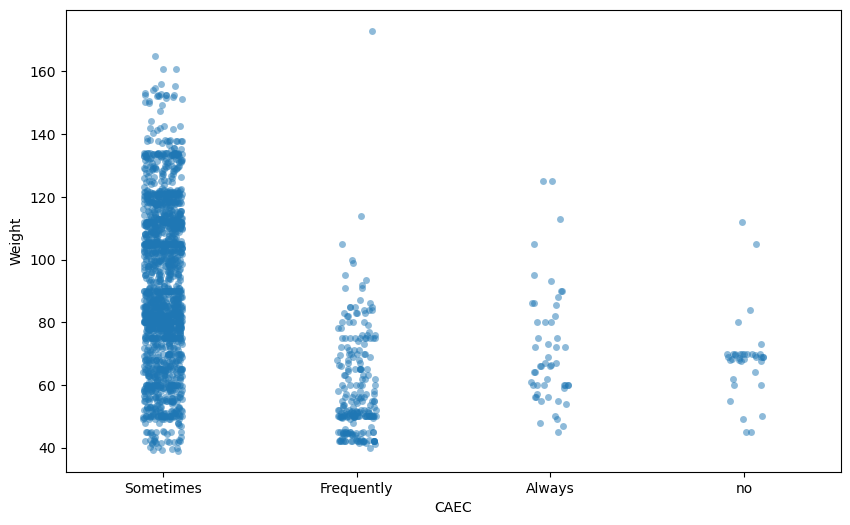

In [17]:
# eating food between meals

fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CAEC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

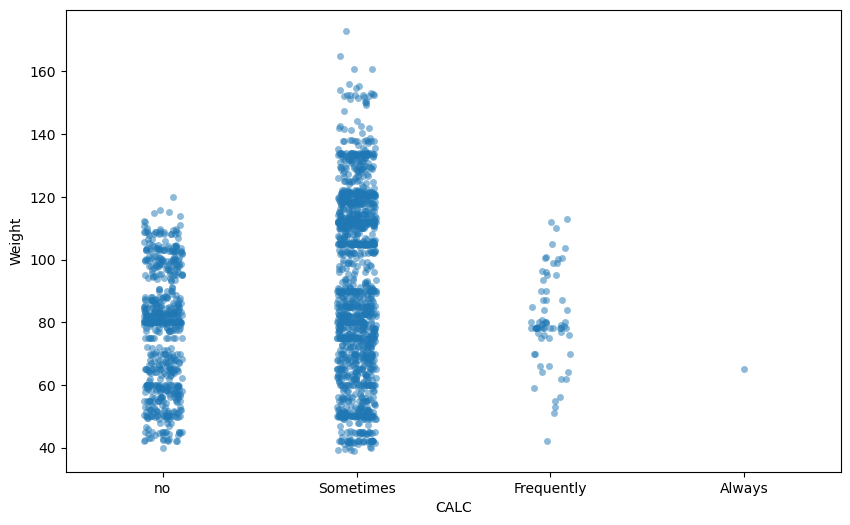

In [18]:
# Consumption of alcohol

fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CALC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

### Some visualization for numerical features

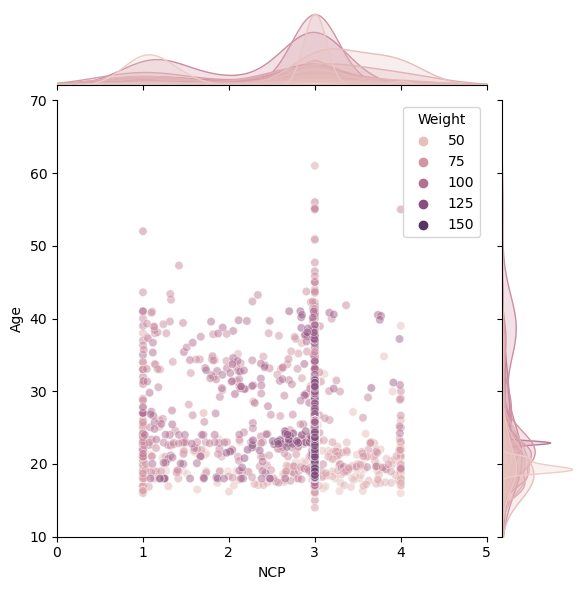

In [19]:
# Number of main meals

sns.jointplot(x=data['NCP'], y=data['Age'], alpha=0.5, hue=data['Weight'], height=6);

# Set the axis limits for zooming in
plt.xlim(0, 5)
plt.ylim(10, 70)

plt.show()

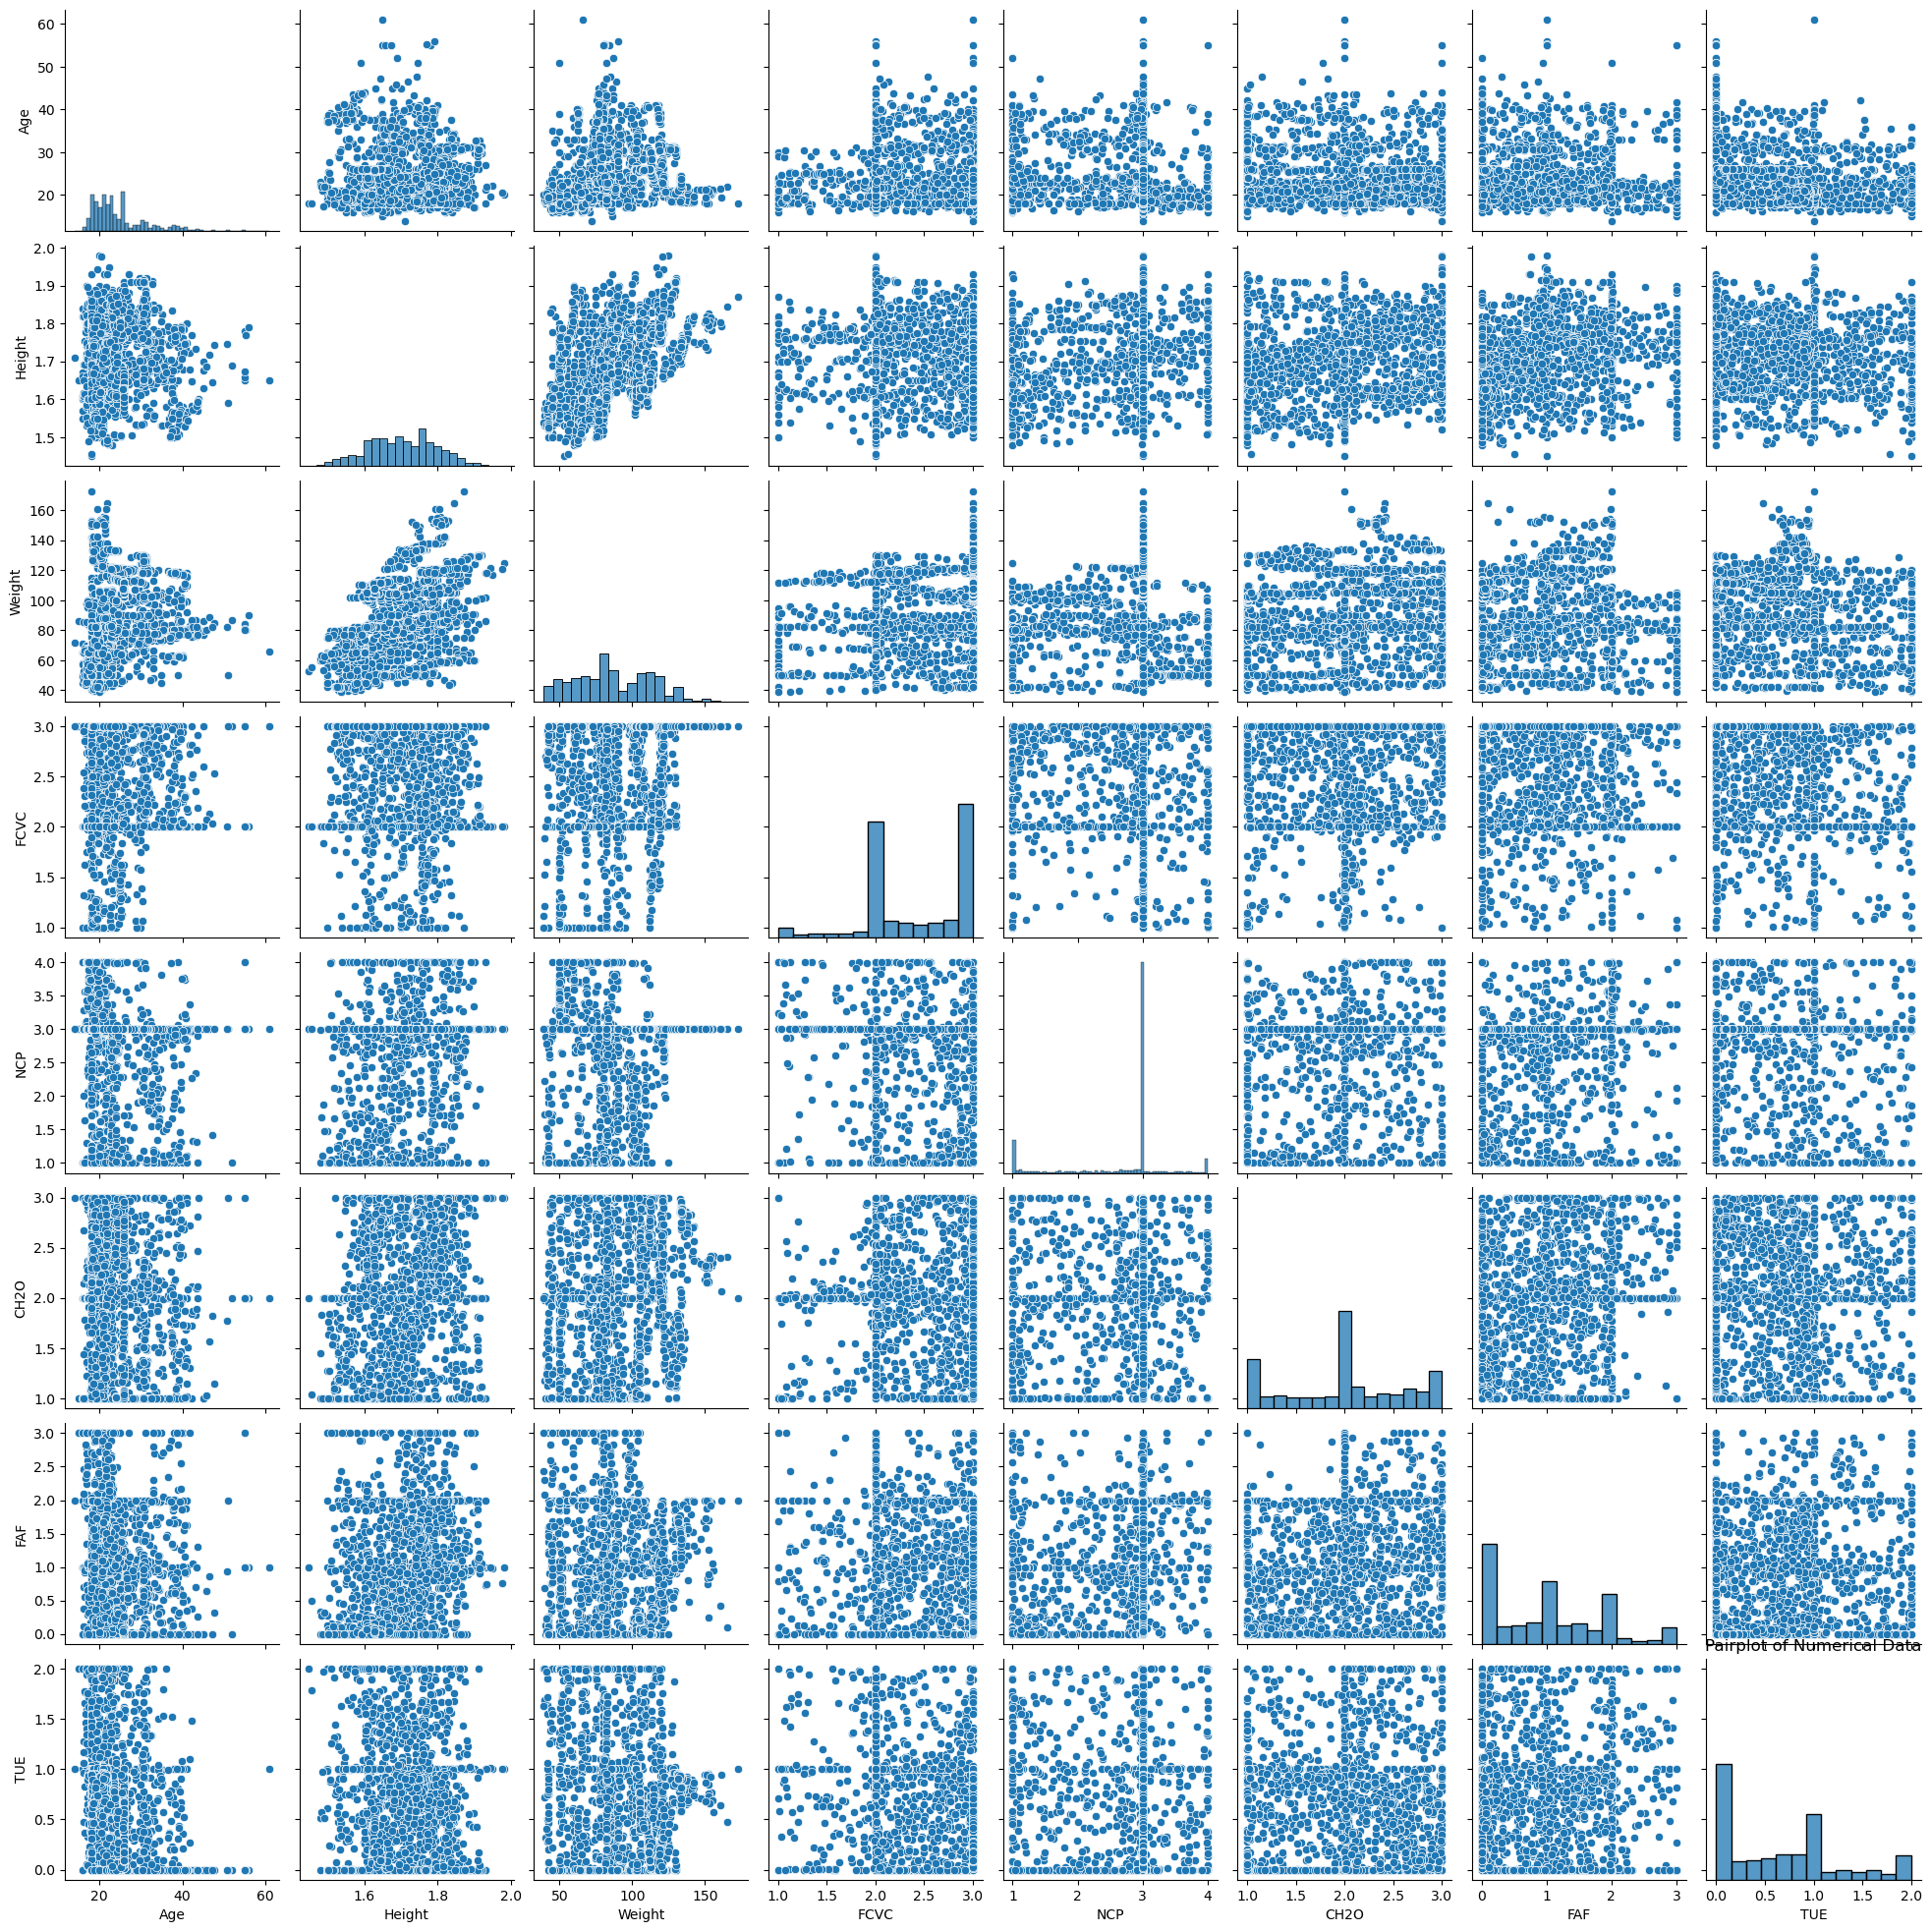

In [20]:
# pairplot numerical data

sns.pairplot(data)
plt.title('Pairplot of Numerical Data')
plt.show()

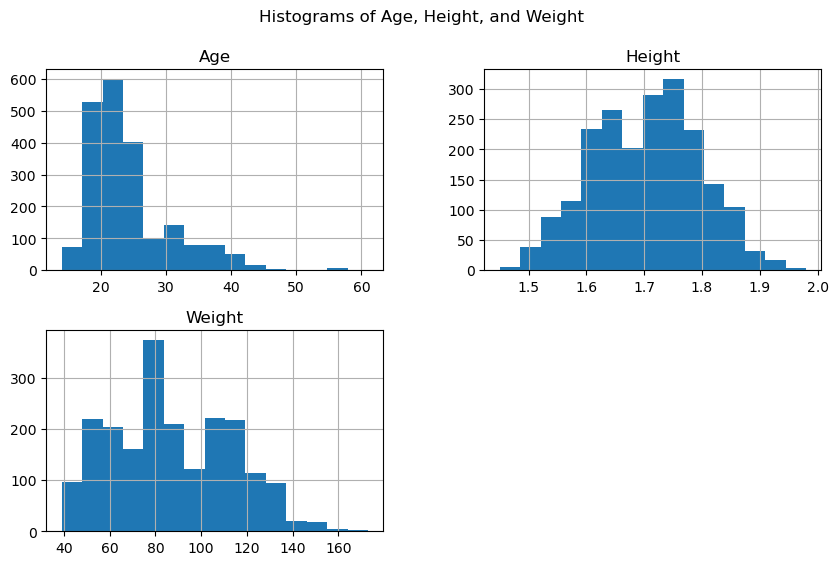

In [21]:
# Histograms

data[['Age', 'Height', 'Weight']].hist(bins=15, figsize=(10, 6))
plt.suptitle('Histograms of Age, Height, and Weight')
plt.show()

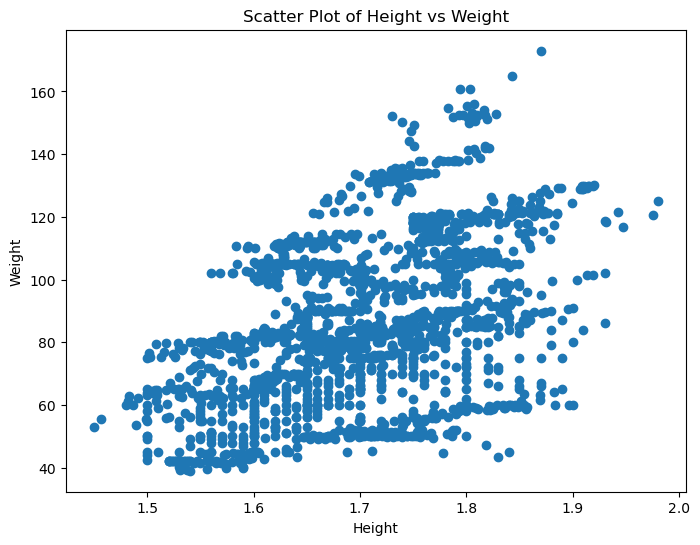

In [22]:
# scatterplot of height vs weight

plt.figure(figsize=(8, 6))
plt.scatter(data['Height'], data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.show()

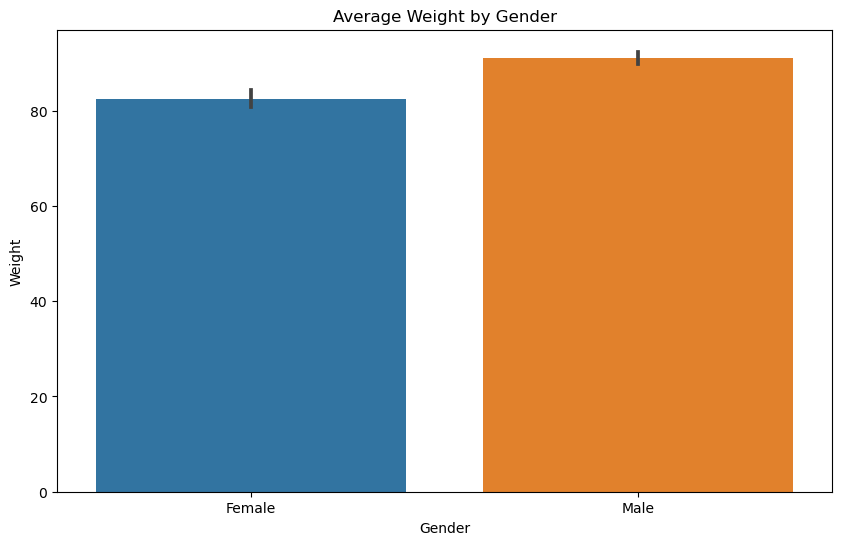

In [23]:
# Bar Plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Weight', data=data)  # Example with 'Weight' and 'Gender'
plt.title('Average Weight by Gender')
plt.show()

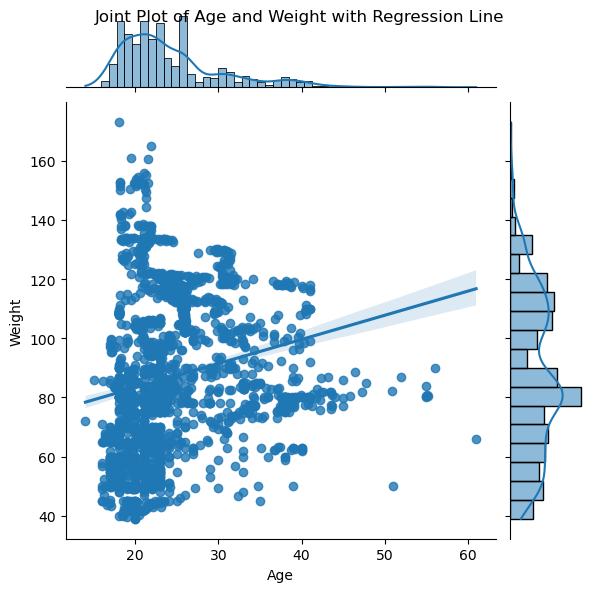

In [24]:
# Joint Plot with regression line

sns.jointplot(x='Age', y='Weight', data=data, kind='reg')
plt.suptitle('Joint Plot of Age and Weight with Regression Line')
plt.show()

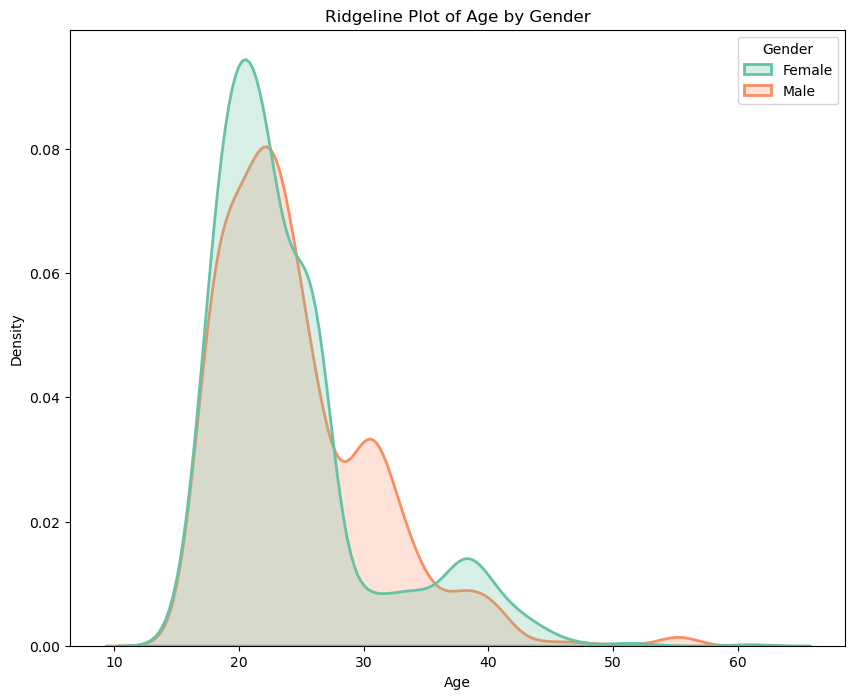

In [25]:
# Ridgeline Plot

plt.figure(figsize=(10, 8))
sns.kdeplot(data=data, x='Age', hue='Gender', fill=True, common_norm=False, palette='Set2', linewidth=2)
plt.title('Ridgeline Plot of Age by Gender')
plt.show()

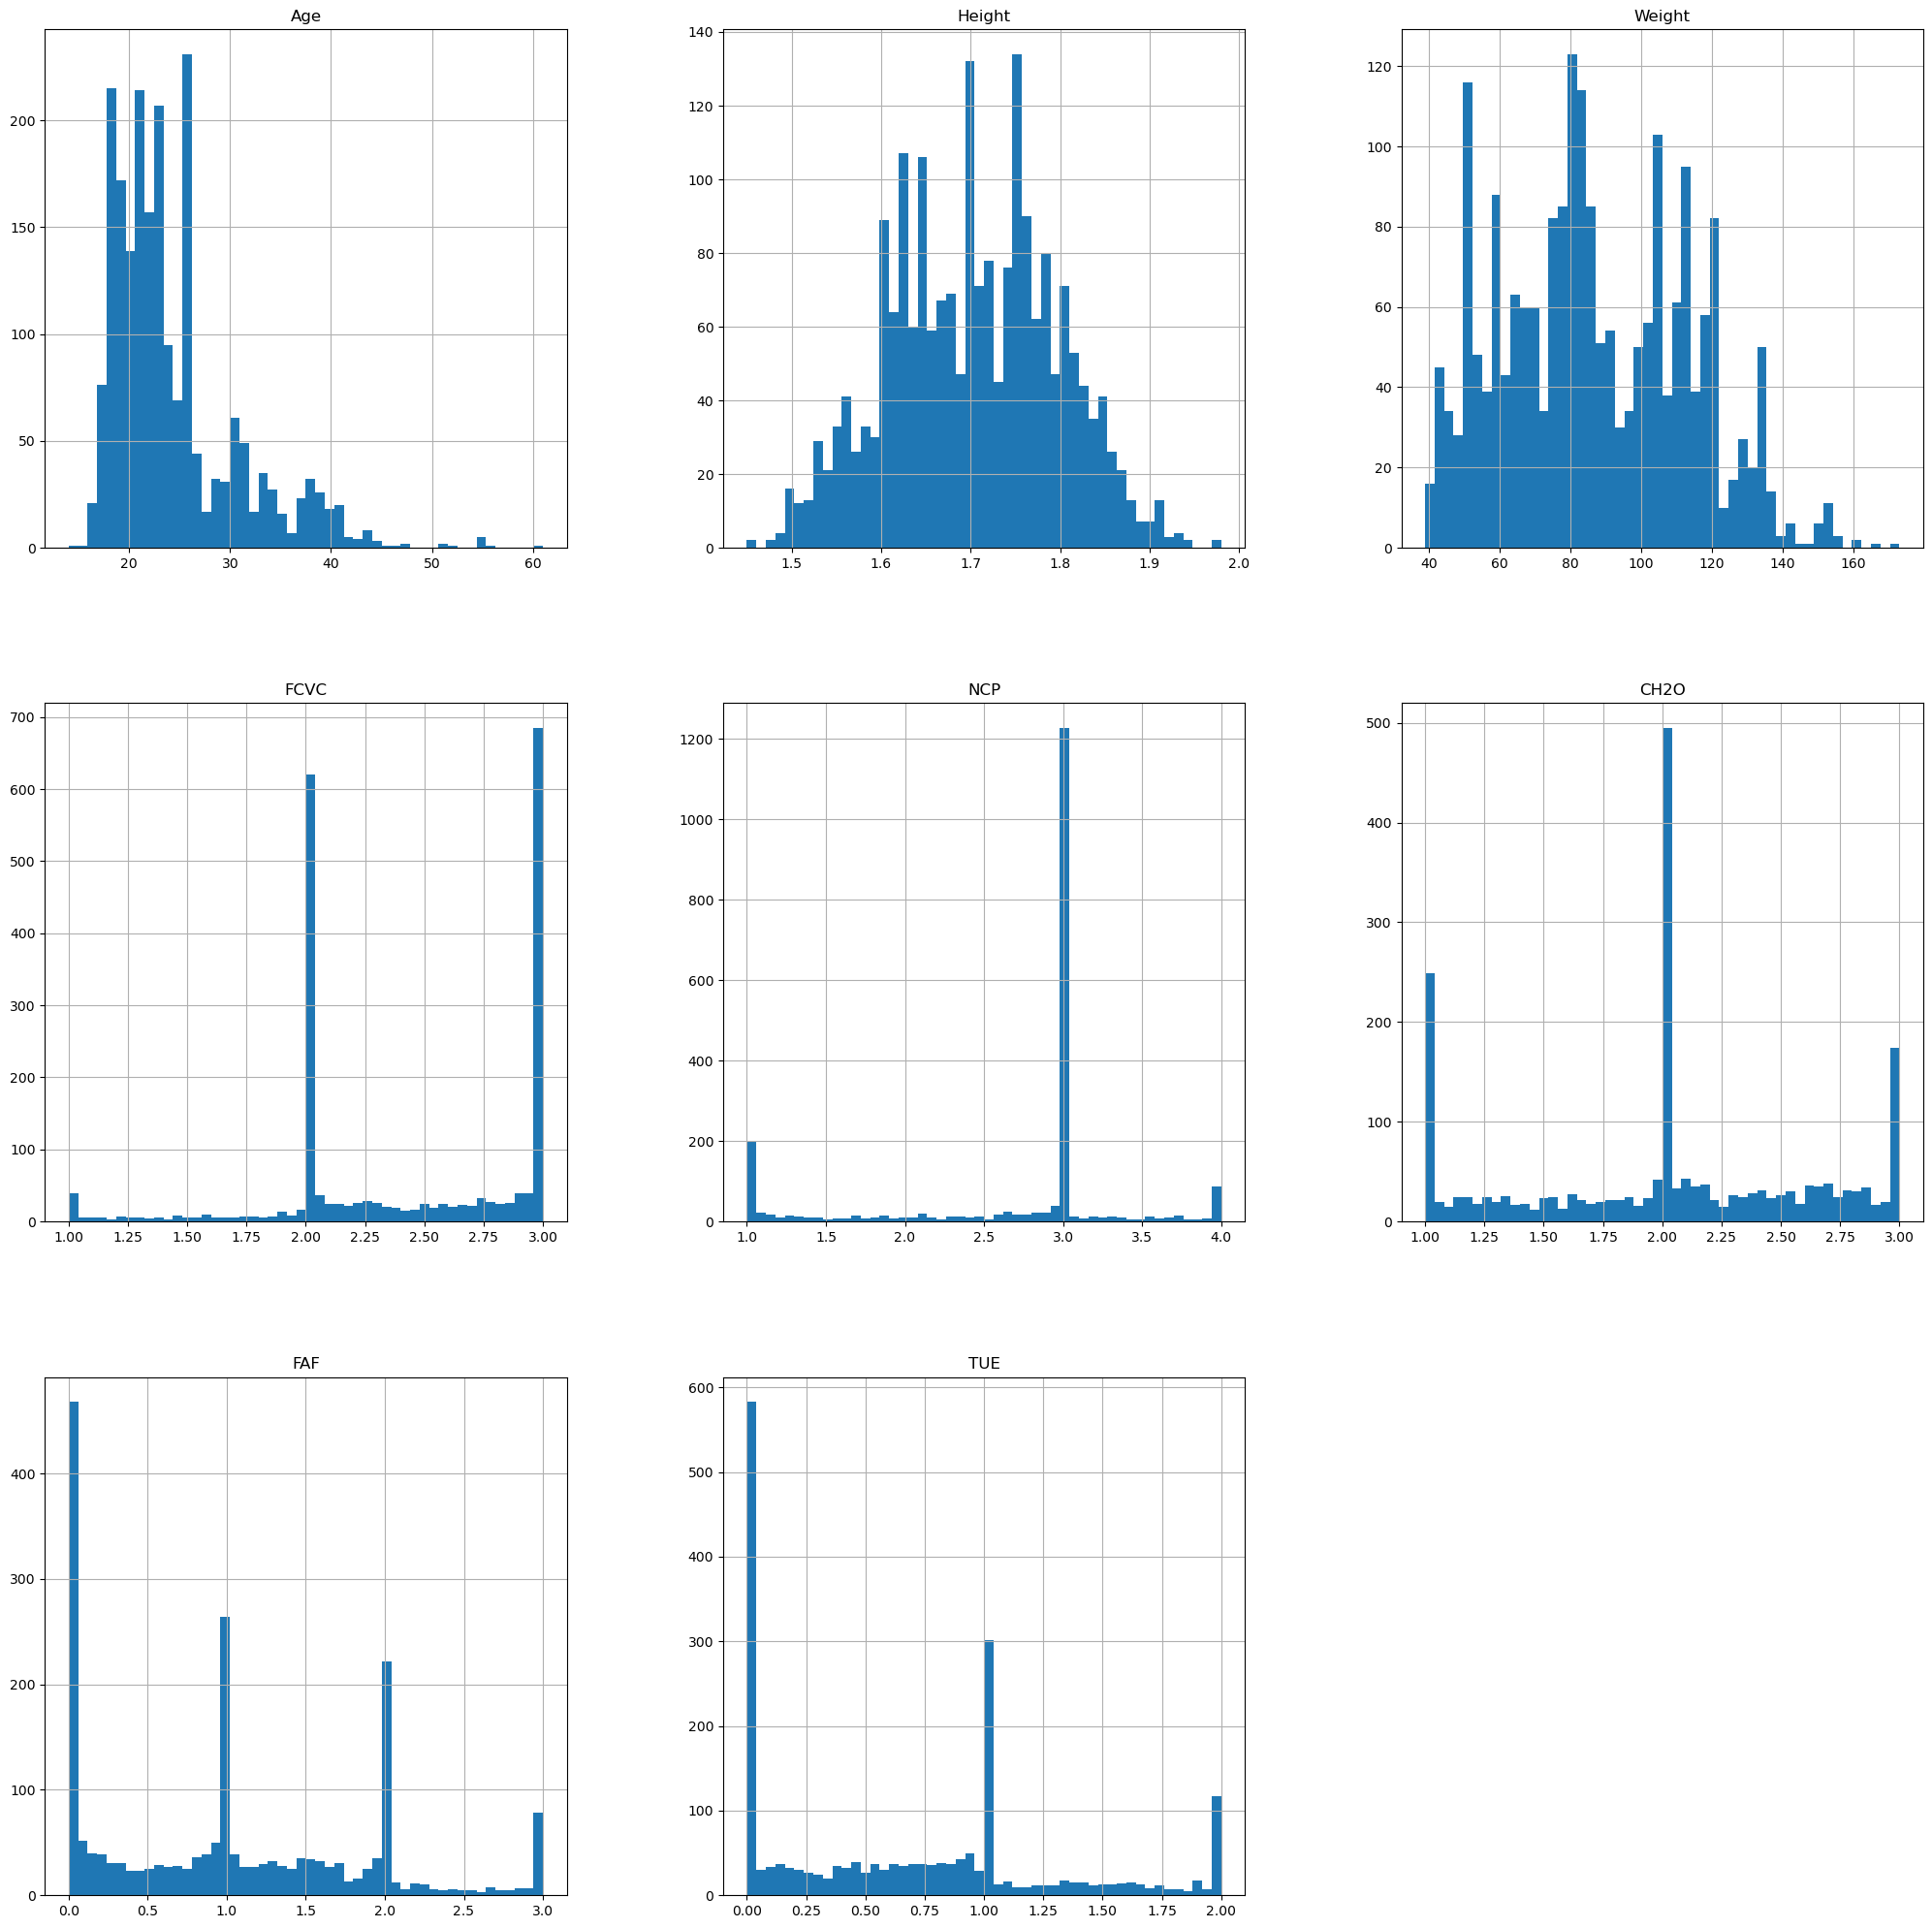

In [26]:
# histogram of different numerical data

%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

### Replacing values from lowest to highest risk

In [27]:
# Create a DataFrame from the data

df = pd.DataFrame(data)

In [28]:
df.replace({"NObeyesdad":{        
    "Obesity_Type_III":6, # HIGHEST risk
    "Obesity_Type_II":5,
    "Obesity_Type_I":4,
    "Overweight_Level_II":3,
    "Overweight_Level_I":2,
    "Normal_Weight":1,
    "Insufficient_Weight":0, # lowert risk
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

C:\Users\anama\AppData\Local\Temp\ipykernel_9620\1557741662.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

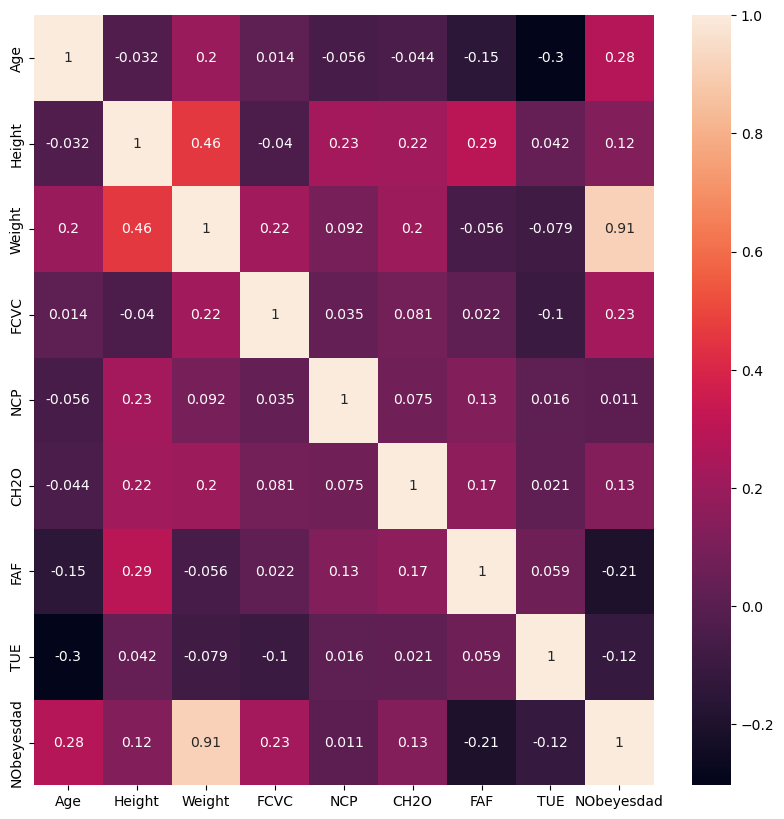

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [30]:
# separating the last column from the rest

# BASED ON WEIGHT
df = df.drop("NObeyesdad", axis=1)

Here we drop the label/last column, but use weight as our target. So, based on the food and activity habits we try to evaluate the weight

In [31]:
# check the data that it looks correct

df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Transportation
547,Female,18.827008,1.700000,50.000000,no,yes,1.000000,3.240578,Sometimes,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
481,Male,18.000000,1.740000,64.000000,yes,yes,3.000000,4.000000,Sometimes,no,1.000000,yes,2.000000,0.000000,Sometimes,Public_Transportation
61,Male,20.000000,1.650000,58.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation
1660,Male,24.178638,1.867410,121.684311,yes,yes,2.954417,2.657720,Sometimes,no,2.104696,no,0.870056,0.000000,Sometimes,Public_Transportation
1894,Female,23.426036,1.739991,133.485478,yes,yes,3.000000,3.000000,Sometimes,no,2.837797,no,1.343875,0.803156,Sometimes,Public_Transportation


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def transform_data(X, X_test):
    numeric_columns = X.select_dtypes(exclude='object').columns
    categorical_columns = X.select_dtypes(include='object').columns

    numeric_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='median')),
        ('preprocessing', PolynomialFeatures(degree=2)),
        ('scaling',StandardScaler(with_mean=True))
    ])

    categorical_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder()),
        ('scaling', StandardScaler(with_mean=False))
    ])

    processing = ColumnTransformer([
        ('numeric', numeric_features, numeric_columns),
        ('categorical', categorical_features, categorical_columns)
    ])

    processing.fit(X)  
    return processing.transform(X), processing.transform(X_test)

## Create Training and Test set

In [33]:
X_original=df.drop(columns="Weight")
y=df["Weight"]

In [34]:
# splitting to training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1669, 15)
Train y dataset shape (1669,)
Test X dataset shape: (418, 15)
Test y dataset shape (418,)


In [35]:
X_train, X_test = transform_data(X_train, X_test)

## Helper function

In [36]:
# cross validation check of the models

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

def print_crossval(scores):
    MAE=-np.mean(scores['test_score'],axis=0)
    print(f'MAE = {MAE:.3f} (Mean Absolute Error for cross validation)')

In [37]:
def evaluate_the_model(y_test, y_pred):
    # Evaluating the model

    # Mean Absolute Error (MAE):
    # average absolute difference between the predicted and actual values
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE):
    # Performance of a predictive model - the smaller the value the better
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE):
    # emphasizes larger errors
    rmse = math.sqrt(mse)

    # R-squared (R2):
    # fit of a regression model
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Percentage Error (MAPE):
    # percentage difference between the predicted and actual values
    mape = (1/len(y_test)) * sum(abs((y_test - y_pred) / y_test)) * 100
    
    
    print("Mean Absolute Error (MAE) %.2f:" % mae)
    print("Mean Squared Error (MSE) %.2f:" % mse)
    print("Root Mean Squared Error (RMSE) %.2f:" % rmse)
    print("R-squared Score (R^2) %.2f:" % r2)
    print("Mean Absolute Percentage Error (MAPE) %.2f:" % mape)

In [38]:
def display_residualplot(residuals, y_pred):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.show()

# Build ML models

The following section will contain all models that performed well, that we chose to improve.

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
print_crossval(cross_validate(random_forest, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
random_forest.fit(X_train, y_train)

In [ ]:
y_pred8 = random_forest.predict(X_test)

residuals8 = y_test - y_pred8
display_residualplot(residuals8, y_pred8)
evaluate_the_model(y_test, y_pred8)

## Random Forest Regression - Hypertuning

In [ ]:
# # R-squared Score (R^2) 0.90:
# # Mean Absolute Percentage Error (MAPE) 7.50:

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=42)
# print_crossval(cross_validate(rf, X_train,y_train,scoring='neg_mean_absolute_error', cv=10))

# parameters = {
#     'n_estimators': [800],
#     'max_depth': [18],
#     'max_features': [None]
#     }

# brf = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=10)
# brf.fit(X_train,y_train)

# y_predrf=brf.predict(X_test)
# residuals2 = y_test - y_predrf
# display_residualplot(residuals2, y_predrf)
# print("Results gathered after tuning:")
# evaluate_the_model(y_test, y_predrf)

## XGBoost (Extreme Gradient Boosting)

In [ ]:
# !pip install xgboost
import xgboost as xgb

In [ ]:
# Creating and training a XG-Boost model

xgb_regressor = xgb.XGBRegressor()
print_crossval(cross_validate(xgb_regressor, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
xgb_regressor.fit(X_train,y_train)

In [ ]:
y_pred44 = xgb_regressor.predict(X_test)
# Scatter plot of predicted values vs. residuals

residuals44 = y_test - y_pred44
display_residualplot(residuals44, y_pred44)
evaluate_the_model(y_test, y_pred44)

## XGBoost (Extreme Gradient Boosting) - Hypertuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Define the search space
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

# Define the search space
param_grid = { 
    "colsample_bytree": [0.3, 0.5, 0.8],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0, 0.5, 1, 5],
    "n_estimators": [50, 100, 500],
    "learning_rate": [0.1, 0.01, 0.001],
    "random_state" : [42]
}

scoring = "neg_root_mean_squared_error"


# Set up the k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')  # objective='reg:squarederror' for regression

# Define grid search
grid_search = GridSearchCV(estimator=xgb_regressor, 
                           param_grid=param_grid, 
                           scoring = scoring,
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

# Fit grid search
grid_result = grid_search.fit(X_train, y_train)

# Print grid search summary
print('Best Hyperparameters:', grid_result.best_params_)


In [ ]:
xgb_regressor = xgb.XGBRegressor(**{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'reg_alpha': 5, 'reg_lambda': 0.5})

# running on the training data
xgb_regressor.fit(X_train,y_train)

y_pred_xgb = xgb_regressor.predict(X_test)
# get some metrics - Polynomial Regression Model - hyper-tuned
evaluate_the_model(y_test, y_pred_xgb)

## LGBM (Light Gradient Boosting Machine)

In [ ]:
# !pip install lightgbm -- NEEDS this
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(X_train, label=y_train)
# print_crossval(cross_validate(lgb_train, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
lgb_test = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',  
    'metric': 'l2' 
}

num_round = 100  # Number of boosting iterations
lgb_model = lgb.train(params, lgb_train, num_round)

In [ ]:
y_pred10 = lgb_model.predict(X_test)

residuals10 = y_test - y_pred10
display_residualplot(residuals10, y_pred10)
evaluate_the_model(y_test, y_pred10)

## LGBM (Light Gradient Boosting Machine) - Hypertuning

In [ ]:
# # R-squared Score (R^2) 0.90:
# # Mean Absolute Percentage Error (MAPE) 7.05:
# lgb_model = lgb.LGBMRegressor()
# print_crossval(cross_validate(lgb_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))

# param_grid = {
#     'num_leaves': [50],
#     'learning_rate': [0.05],
#     'n_estimators': [300],
#     'colsample_bytree': [0.4]
# }

# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.bestparams_


# best_lgb_model = lgb.LGBMRegressor(**best_params)
# best_lgb_model.fit(X_train, y_train)

# y_pred = best_lgb_model.predict(X_test)
# residuals = y_test - y_pred
# display_residualplot(residuals, y_pred)
# print("Results gathered after tuning:")
# evaluate_the_model(y_test, y_pred)

## Neural Network Regression

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Predicting a continuous variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can choose the appropriate optimizer and loss function
# print_crossval(cross_validate(model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred113 = model.predict(X_test)


In [ ]:
y_pred113.shape

In [ ]:
y_test

In [ ]:
y_pred113 = y_pred113.ravel().tolist()

In [ ]:
residuals113 = y_test - y_pred113
display_residualplot(residuals113, y_pred113)
evaluate_the_model(y_test, y_pred113)

## Neural Network Regression - Hypertuning

In [ ]:
from sklearn.neural_network import MLPRegressor

# Define the parameter grid
param_grid1 = {
#     'hidden_layer_sizes': [(256, 128, 128, 64), (128, 64, 64, 32), (512, 256, 128, 64)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'max_iter': [100, 200, 300]

    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (256,128,64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001,0.1, 0.05],
}


model1 = MLPRegressor(max_iter=200)

# Set up the grid search
grid_search = GridSearchCV(model1, param_grid1, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

In [ ]:
# {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
# MLPRegressor(activation='tanh', alpha=0.05, max_iter=150, solver='sgd')

final_model = MLPRegressor(**best_params)

# Train the final model
final_model.fit(X_train, y_train)

# Make predictions
y_pred_NN = final_model.predict(X_test)
evaluate_the_model(y_test, y_pred_NN)

## KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k_neighbors = KNeighborsRegressor(n_neighbors=5)  # Define the number of neighbors
print_crossval(cross_validate(k_neighbors, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
k_neighbors.fit(X_train, y_train)

In [ ]:
y_pred12 = k_neighbors.predict(X_test)

residuals12 = y_test - y_pred12
display_residualplot(residuals12, y_pred12)
evaluate_the_model(y_test, y_pred12)

## KNeighborsRegressor - Hypertuning

In [ ]:
# # R-squared Score (R^2) 0.86:
# # Mean Absolute Percentage Error (MAPE) 6.83:

# from sklearn.neighbors import KNeighborsRegressor

# knn = KNeighborsRegressor()
# print_crossval(cross_validate(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

# param_grid = {
#     'n_neighbors': [2, 4, 6, 8],  # Number of neighbors to consider
#     'weights': ['distance'],  # Weighting scheme for neighbors
#     'p': [1]  # 1 for Manhattan distance, 2 for Euclidean distance
# }
# grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = 'neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)
# best_knn_model = grid_search.bestestimator

# y_pred = best_knn_model.predict(X_test)
# residuals2 = y_test - y_pred
# display_residualplot(residuals2, y_pred)
# print("Results gathered after tuning:")
# evaluate_the_model(y_test, y_pred)

## BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
base_model = DecisionTreeRegressor()  # Defining the base estimator
bagging = BaggingRegressor(base_model, n_estimators=10, random_state=42)  # Number of base estimators
print_crossval(cross_validate(bagging, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
bagging.fit(X_train, y_train)

In [ ]:
y_pred13 = bagging.predict(X_test)

residuals13 = y_test - y_pred13
display_residualplot(residuals13, y_pred13)
evaluate_the_model(y_test, y_pred13)

## BaggingRegressor - Hypertuning

In [ ]:
#  Define the parameter grid
# Define the base estimator
base_model = DecisionTreeRegressor()

# Define the BaggingRegressor
bagging = BaggingRegressor(base_model, random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
# Set up the grid search
grid_search = GridSearchCV(bagging, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)

In [ ]:
# Train the best estimator
best_estimator.fit(X_train, y_train)

# Make predictions
y_pred13 = best_estimator.predict(X_test)

# Perform evaluation
residuals13 = y_test - y_pred13
display_residualplot(residuals13, y_pred13)
evaluate_the_model(y_test, y_pred13)

## ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
print_crossval(cross_validate(extra_trees, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
extra_trees.fit(X_train, y_train)

In [ ]:
y_pred15 = extra_trees.predict(X_test)

residuals15 = y_test - y_pred15
display_residualplot(residuals15, y_pred15)
evaluate_the_model(y_test, y_pred15)

## ExtraTreesRegressor - Hypertuning

In [ ]:
# # R-squared Score (R^2) 0.89:
# # Mean Absolute Percentage Error (MAPE) 7.58:

# from sklearn.ensemble import ExtraTreesRegressor

# extra_trees = ExtraTreesRegressor(random_state=42)
# print_crossval(cross_validate(extra_trees, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))

# param = {
#     'n_estimators': [300],
#     'max_depth': [18],
#     'min_samples_split': [16],
#     'min_samples_leaf': [2],
#     'max_features': ['auto', 'sqrt', 'log2'],
# }

# # Create GridSearchCV with cross-validation (e.g., 5-fold)
# grid_search2 = GridSearchCV(extra_trees, param, cv=5, scoring='neg_mean_squared_error')
# grid_search2.fit(X_train, y_train)


# y_pre= grid_search2.predict(X_test)
# residuals = y_test - y_pre
# display_residualplot(residuals, y_pre)
# print("Results gathered after tuning:")
# evaluate_the_model(y_test, y_pre)

## ML models tested but not continued with

Here we have left all the models we tried out but with default settings but didn't give good enough results to continue with hypertuning them.

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
print_crossval(cross_validate(linear_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
linear_model.fit(X_train, y_train)

In [ ]:
y_pred1 = linear_model.predict(X_test)

residuals1 = y_test - y_pred1
display_residualplot(residuals1, y_pred1)
evaluate_the_model(y_test, y_pred1)

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
print_crossval(cross_validate(poly_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
poly_model.fit(X_train, y_train)

In [ ]:
y_pred2 = poly_model.predict(X_test)

residuals2 = y_test - y_pred2
display_residualplot(residuals2, y_pred2)
evaluate_the_model(y_test, y_pred2)

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Creating and fitting the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # 'alpha' is the regularization parameter
print_crossval(cross_validate(ridge_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
ridge_model.fit(X_train, y_train)

In [ ]:
y_pred3 = ridge_model.predict(X_test)

residuals3 = y_test - y_pred3
display_residualplot(residuals3, y_pred3)
evaluate_the_model(y_test, y_pred3)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Creating and fitting the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # 'alpha' is the regularization parameter
print_crossval(cross_validate(lasso_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
lasso_model.fit(X_train, y_train)

In [ ]:
y_pred4 = lasso_model.predict(X_test)

residuals4 = y_test - y_pred4
display_residualplot(residuals4, y_pred4)
evaluate_the_model(y_test, y_pred4)

### ElasticNet Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
print_crossval(cross_validate(elasticnet_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
elasticnet_model.fit(X_train, y_train)

In [ ]:
y_pred5 = elasticnet_model.predict(X_test)

residuals5 = y_test - y_pred5
display_residualplot(residuals5, y_pred5)
evaluate_the_model(y_test, y_pred5)

### Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel for non-linear regression
print_crossval(cross_validate(svr_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
svr_model.fit(X_train, y_train)

In [ ]:
y_pred6 = svr_model.predict(X_test)

residuals6 = y_test - y_pred6
display_residualplot(residuals6, y_pred6)
evaluate_the_model(y_test, y_pred6)

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(max_depth=5)  # Set the max depth to avoid overfitting
print_crossval(cross_validate(decision_tree, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
decision_tree.fit(X_train, y_train)

In [ ]:
y_pred7 = decision_tree.predict(X_test)

residuals7 = y_test - y_pred7
display_residualplot(residuals7, y_pred7)
evaluate_the_model(y_test, y_pred7)

### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
print_crossval(cross_validate(gradient_boosting, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
gradient_boosting.fit(X_train, y_train)

In [ ]:
y_pred9 = gradient_boosting.predict(X_test)

residuals9 = y_test - y_pred9
display_residualplot(residuals9, y_pred9)
evaluate_the_model(y_test, y_pred9)

### AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
base_model = DecisionTreeRegressor(max_depth=2)  # Defining the base estimator
adaboost = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)  # Number of base estimators
print_crossval(cross_validate(adaboost, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
adaboost.fit(X_train, y_train)

In [ ]:
y_pred14 = adaboost.predict(X_test)

residuals14 = y_test - y_pred14
display_residualplot(residuals14, y_pred14)
evaluate_the_model(y_test, y_pred14)